##Exercise Interpolation

In [67]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

1) Plot these four points (2,3), (3,1), (4,2), (5,2).

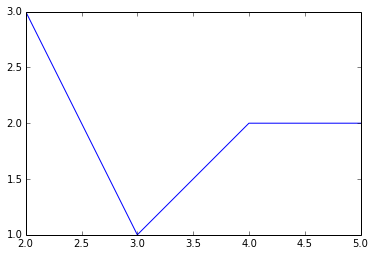

In [112]:
xs = [2,3,4,5]
ys = [3,1,2,2]
plt.plot(xs,ys)


2) Find the polynomial of degree 3 that pass through these four points. Plot to verify.

In [15]:
a_1 = lambda x: 3*((x - 3) * (x - 4) * (x - 5))/((2. - 3) * (2 - 4) * (2 - 5))
a_2 = lambda x: ((x - 2) * (x - 4) * (x - 5))/((3. - 2) * (3 - 4) * (3 - 5))
a_3 = lambda x: 2*((x - 3) * (x - 2) * (x - 5))/((4. - 3) * (4 - 2) * (4 - 5))
a_4 = lambda x: 2*((x - 3) * (x - 4) * (x - 2))/((5. - 3) * (5 - 4) * (5 - 2))

a_5 = lambda x: a_1(x) + a_2(x) + a_3(x) + a_4(x)

In [105]:
def get_f(xs, y, idx):
    bottom = np.product([ 1. if (i == idx) else xs[idx] - xs[i] for i in xrange(len(xs)) ])
    def f(x):
        top = np.product([y if (i == idx) else x - xs[i] for i in xrange(len(xs)) ])
        return top/bottom
    return f

#     bottom = 1
#     for i in xrange(len(xs)):
#         if idx != i:
#             bottom *= (xs[idx] - xs[i])
#    top = y
#         for i in xrange(len(xs)):
#             if idx != i:
#                 top *= (x - xs[i])

In [101]:
fs = [get_f(xs, ys[i], i) for i in xrange(len(xs))]

In [102]:
# print(fs[0](2))
# print((2-3) * (2-4) * (2-5))
# print(-1*-2*-3)

In [103]:
func = lambda x: sum([f(x) for f in fs])

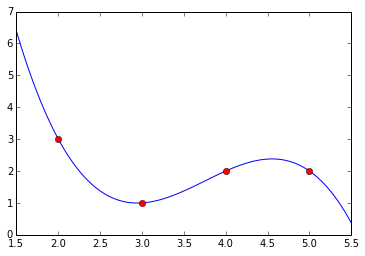

In [118]:
pxs = np.linspace(1.5,5.5,100)
pys = [func(x) for x in pxs]
plt.plot(pxs, pys)
plt.plot(xs,ys, 'ro')

3) Find polynomial of degree 3 that pass through these four points. Plot to verify.

(1,2) (2,0) (3,2) (7,1)

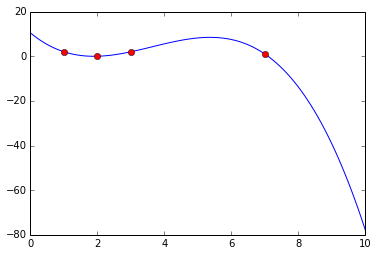

In [119]:
xs = [1, 2, 3, 7]
ys = [2, 0, 2, 1]

fs = [get_f(xs, ys[i], i) for i in xrange(len(xs))]
func = lambda x: sum([f(x) for f in fs])

pxs = np.linspace(0, 10, 100)
pys = [func(x) for x in pxs]
plt.plot(pxs, pys)
plt.plot(xs,ys, 'ro')

4) Write a function `ledendre(x, xs, ys)` which compute the legendre polynomial given the list of x values in xs and y values in ys.

`legendre(1.5, [1,2,3,7], [2,0,2,1])`

should have the same value as the polymial you found in 3) evaluated at x=1.5.

For those of you who know functional programming try write a functor that return a polynomial.

In [120]:
def legendre(x, xs, ys):
    fs = [get_f(xs, ys[i], i) for i in xrange(len(xs))]
    func = lambda x: sum([f(x) for f in fs])
    return func(x)

5) Now sample 11 points  from $f(x) = \sin(x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Make sure your $\sin(x)$ is plotted with more than 100 points

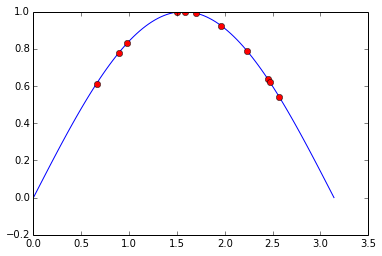

In [135]:
xs = np.random.rand(11)*np.pi
ys = np.sin(xs)

fs = [get_f(xs, ys[i], i) for i in xrange(len(xs))]
func = lambda x: sum([f(x) for f in fs])

pxs = np.linspace(0, np.pi, 100)
pys = [func(x) for x in pxs]
plt.plot(pxs, pys)
plt.plot(xs,ys, 'ro')

6) Plot legendre polynomial for these points. How similar is it to $\sin(x)$ function. Make sure your legendre is plotte with at least 100 points.

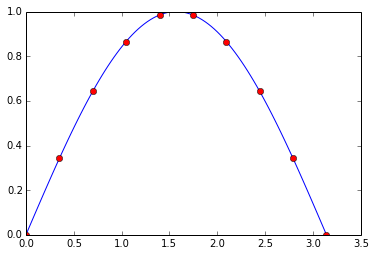

In [141]:
xs = np.linspace(0, np.pi, 10)
ys = np.sin(xs)

fs = [get_f(xs, ys[i], i) for i in xrange(len(xs))]
func = lambda x: sum([f(x) for f in fs])

pxs = np.linspace(0, np.pi, 100)
pys = [func(x) for x in pxs]
plt.plot(pxs, pys)
plt.plot(xs,ys, 'ro')

7) Now sample 11 points  from $f(x) = \sin(200x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Note the 200. Then plot legendre polynomial for these points.

(-1.2, 1.2)

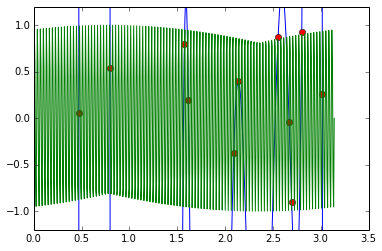

In [155]:
xs = np.random.rand(11)*np.pi
ys = np.sin(200*xs)

fs = [get_f(xs, ys[i], i) for i in xrange(len(xs))]
func = lambda x: sum([f(x) for f in fs])

pxs = np.linspace(0, np.pi, 500)
pys = [func(x) for x in pxs]

sxs = pxs
sys = np.sin(200*pxs)
plt.plot(pxs, pys)
plt.plot(xs,ys, 'ro')
plt.plot(sxs, sys, 'g')
plt.ylim(-1.2,1.2)

8) Does it pass through all the point? Does it look like the original function.

# Exercise Integration

0) What is $$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

In [73]:
def f(x):
    return x**3

def cal_area(fm, to, n):
    a = f(fm)/2. + f(to)/2.
    h = (to - fm)/float(n)
    x = fm + h
    while x < to:
        a += f(x)
        x += h
    return a * h

In [74]:
def fdx(x):
    return (x**4)/4.

fdx(3) - fdx(1)

20.0

1)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 1 piece.

In [75]:
cal_area(1, 3, 1)

28.0

2)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 100 pieces.

In [76]:
cal_area(1, 3, 100)

20.00080000000003

3) What is the bound on error for 1)?

4) What is the bound on error for 2)?

5) Compute the following integral
$$ \int \limits_{x=0}^{x=1} e^{-x} \sin(x^2) \; dx $$

using 100 sub divisions. This is one of those thing you can't do by hands. 

In [77]:
def f(x):
    return np.exp(-x) * np.sin(x**2)

def cal_area(fm, to, n):
    a = (f(fm) + f(to)) * 0.5
    h = (to - fm)/float(n)
    x = fm + h
    while x < to:
        a += f(x)
        x += h
    return a * h

In [78]:
cal_area(0, 1, 100)

0.15091330026867275

6) If we want compute
$$ \int \limits_{x=0}^{x=1} e^{-x} \; dx $$
that is at most $10^{-6}$ away from the real answer. How many subdivisions do we need?

7) Compute the integral above and make sure your answer is at most $10^-6$ away from the real answer. 